## Data download CMORPH

In [270]:
import wget
import urllib

In [274]:
# test with one file
urllib.request.urlretrieve('ftp://ftp.cpc.ncep.noaa.gov/precip/CMORPH_V1.0/CRT/8km-30min/2017/CMORPH_V1.0_ADJ_8km-30min_201701.tar', filename= '/media/juli/Elements/CMORPH_30min8km/CMORPH_V1.0_ADJ_8km-30min_201701.tar')

('/media/juli/Elements/CMORPH_30min8km/CMORPH_V1.0_ADJ_8km-30min_201701.tar',
 <email.message.Message at 0x7fb6bd7df080>)

In [286]:
out = '/media/juli/Elements/CMORPH_30min8km/'
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
years= ['2015', '2016', '2017']

# populate dictionary with all files which have to be downloaded 
for y in years:
    print('download year   ', y)
    url_dic= {} 
    url = 'ftp://ftp.cpc.ncep.noaa.gov/precip/CMORPH_V1.0/CRT/8km-30min/'+y+'/'
    for m in months:
        url_dic[m]= url+'CMORPH_V1.0_ADJ_8km-30min_'+y +  m +'.tar'
        
    # download and print filenames belonging to respective year
    for l in url_dic:
        print('downloading ', url_dic[l], '...........................')
        urllib.request.urlretrieve(url_dic[l], filename= out + url_dic[l][66::] )
        print(filename)
    
        

download year    2015
downloading  ftp://ftp.cpc.ncep.noaa.gov/precip/CMORPH_V1.0/CRT/8km-30min/2015/CMORPH_V1.0_ADJ_8km-30min_201501.tar ...........................
CMORPH_V1.0_ADJ_8km-30min_2017050506
downloading  ftp://ftp.cpc.ncep.noaa.gov/precip/CMORPH_V1.0/CRT/8km-30min/2015/CMORPH_V1.0_ADJ_8km-30min_201502.tar ...........................
CMORPH_V1.0_ADJ_8km-30min_2017050506
downloading  ftp://ftp.cpc.ncep.noaa.gov/precip/CMORPH_V1.0/CRT/8km-30min/2015/CMORPH_V1.0_ADJ_8km-30min_201503.tar ...........................
CMORPH_V1.0_ADJ_8km-30min_2017050506
downloading  ftp://ftp.cpc.ncep.noaa.gov/precip/CMORPH_V1.0/CRT/8km-30min/2015/CMORPH_V1.0_ADJ_8km-30min_201504.tar ...........................
CMORPH_V1.0_ADJ_8km-30min_2017050506
downloading  ftp://ftp.cpc.ncep.noaa.gov/precip/CMORPH_V1.0/CRT/8km-30min/2015/CMORPH_V1.0_ADJ_8km-30min_201505.tar ...........................
CMORPH_V1.0_ADJ_8km-30min_2017050506
downloading  ftp://ftp.cpc.ncep.noaa.gov/precip/CMORPH_V1.0/CRT/8km-30min

## Read in CMORPH data in binary format 

In [210]:
import numpy as np
import array
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [225]:
file=  '/media/juli/Elements/CMORPH_30min8km/201705/CMORPH_V1.0_ADJ_8km-30min_2017050506'

In [226]:
Latitude =  27
Longitude = 70
gridspacing_lon = 0.072756669
gridspacing_lat = 0.072771377
lat_index = int(np.round(abs(-59.963614 - Latitude) / gridspacing_lat))
lon_index = int(np.round(abs(0.036378335 + Longitude) / gridspacing_lon))
lat2= 45
lon2= 105
lat_index2 = int(np.round(abs(-59.963614 - lat2) / gridspacing_lat))
lon_index2 = int(np.round(abs(0.036378335 + lon2) / gridspacing_lon))

In [227]:
# get files in directory
file = '/media/juli/Elements/CMORPH_30min8km/201705/CMORPH_V1.0_ADJ_8km-30min_2017050506'
file= str(file)

# Extract filename and date attributes
filename = str(file[44::])
year=filename[26:30]
month=filename[30:32]
day=filename[32:34]
hour= filename[34:36]


In [228]:
with open(file, mode='rb') as f: # b is important -> binary
    fileContent = f.read()

In [229]:
data= open(file, 'r')

In [256]:
f= open(file, mode='rb') # b = binary format 

In [257]:
# fread is a matlab function to read in binary formatted data to array 

# in python: 
import array
a = array.array('f')  # L is the typecode for uint32
a.fromfile(f, 4948*1649)
a= np.array(a)

In [258]:
#a[a < 0] = np.nan
np.shape(a)
a= np.reshape(a,(4948,1649))

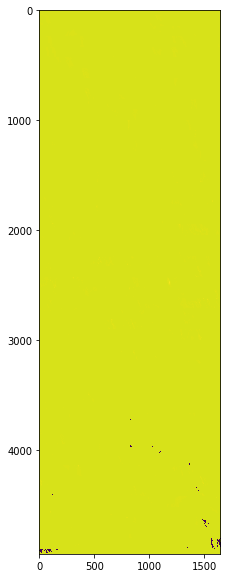

In [259]:
plt.figure(figsize= (10,10))
plt.imshow(a, cmap= 'viridis')
plt.show()


In [246]:
# Return fileobject  
f= open(file, mode='rb') # b = binary format 

# Each file contains 2 layers for each half hour there is one layer
for i in np.arange(2):
    # fread the openen rainfall binary data with dimensions 4948*1648
    # use real*4 for floating points with 32 bytes
    
    a = array.array('f')  # L is the typecode for uint32
    a.fromfile(f, 4948*1649)
    data= np.array(a)

    #data = np.fromfile(file, dtype= float,count =4948*1649,sep= (""))
    data= np.reshape(data, (4948,1649))

    #Extract rainfal from lon, lat location as mm/hr
    rainfall = Rain[lon_index:lon_index2, lat_index:lat_index2] * 0.2
    
    # Store information in new row
    
    # data to xarray 
    xarray = xr.DataArray(rainfall)

    
    #save data as netcdf file 
    output_path= '/media/juli/Elements/CMORPH_30min8km/cmorph_'+ str(year) + str(month) + str(day) + str(hour)+ '.nc4'
    xarray.to_netcdf(output_path, mode = 'w', format='netCDF4') 

    
f.close()
    
    


In [224]:
# lon and lat info 
# two layers 

- what to choose for count parameter in fromfile function ? 
- how is the binary file structures? 
- how to get the two layers? 